Here I show a short example of the TSA. TSA is based on the idea that averaging in time is equivalent to extraction of the shaft speed harmonics in the spectrum.

In [1]:
import numpy as np

fs = 20000 # kSamp / sec
sampleTime = 4 # Sec
t = np.arange(fs * sampleTime) / fs
f = 50 # Hz

In [2]:
from numpy.random import default_rng

noiseSTD = 1

rng = default_rng()
noise = rng.standard_normal(t.shape) * noiseSTD
noise.std()

0.9982206356219869

In [3]:
sig = np.sin(t * f * 2 * np.pi) + np.sin(t * (2 * f) * 2 * np.pi)  + np.sin(t * (3 * f) * 2 * np.pi)
mSig = sig + noise # measured signal

<IPython.core.display.Javascript object>


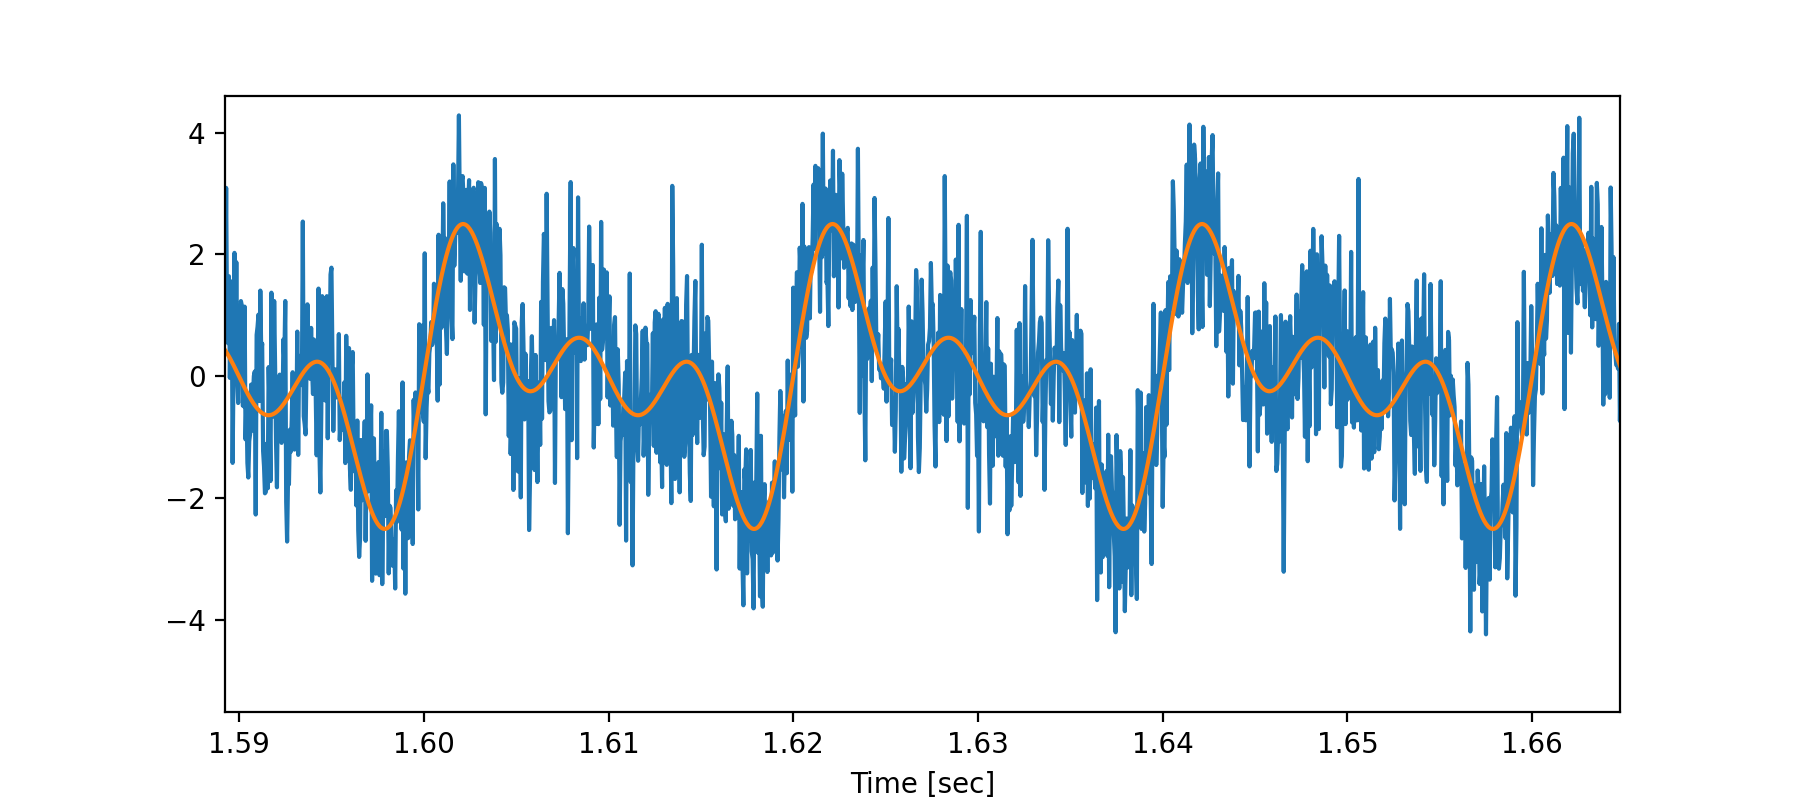

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure(figsize=[9, 4])
plt.plot(t, mSig)
plt.plot(t, sig)
plt.xlabel('Time [sec]')
plt.show()

<IPython.core.display.Javascript object>


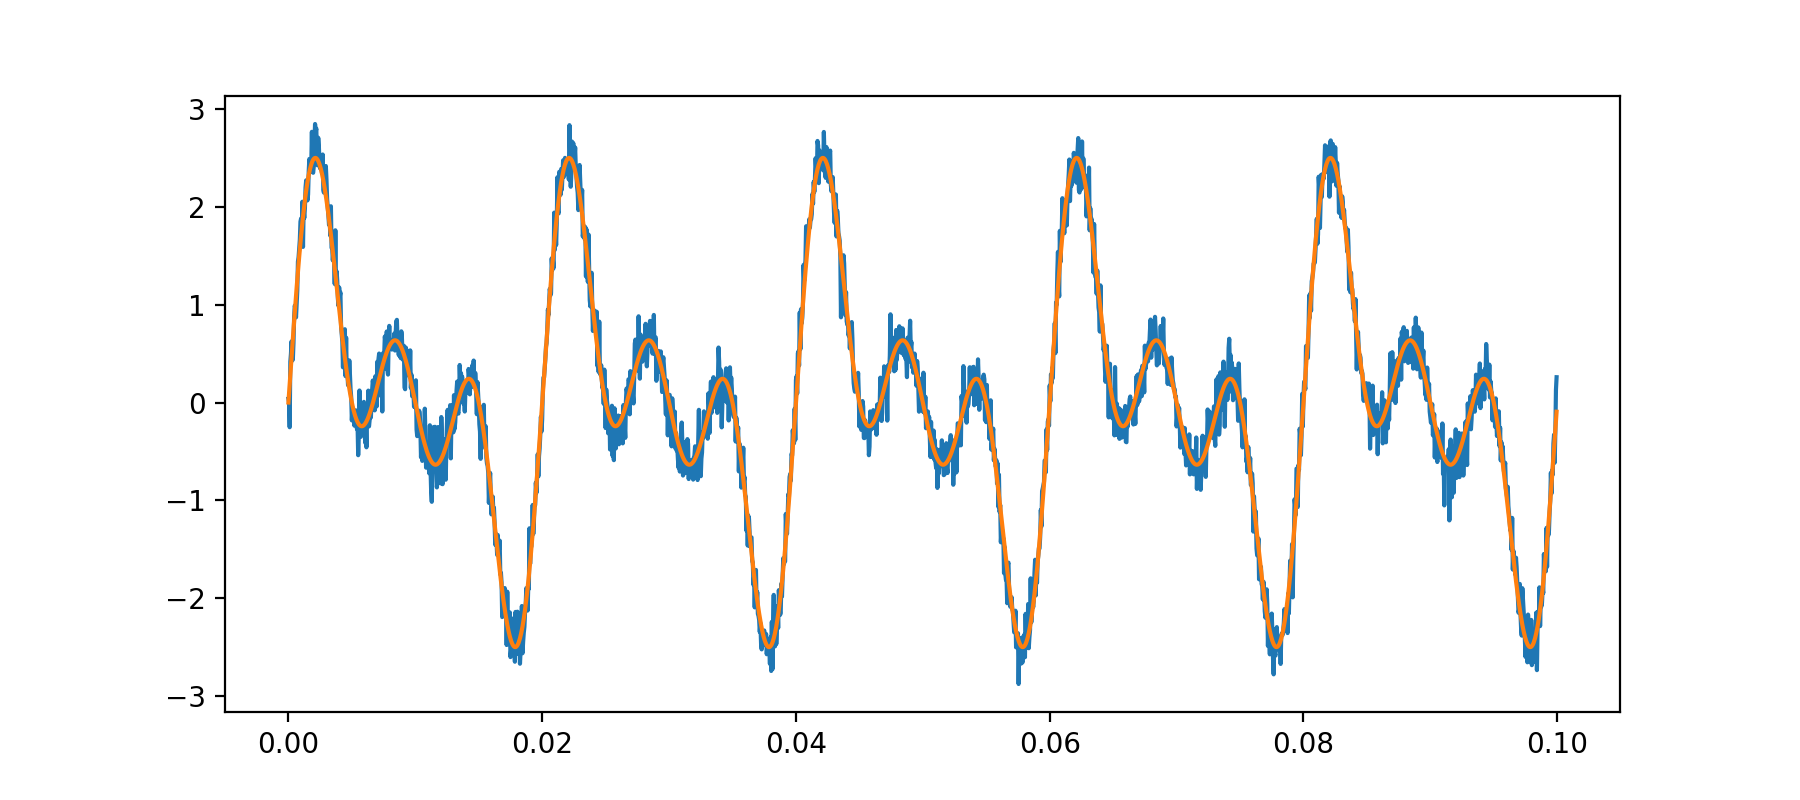

In [5]:
cycleLen = int(fs / f)
aveTime = cycleLen * 5 #arbitrary integer coefficient
nAve = int(t.shape[0] / aveTime)

plt.figure(figsize=[9, 4])
plt.plot(t[:aveTime], mSig.reshape((nAve, aveTime)).mean(axis=0))
plt.plot(t[:aveTime], sig[:aveTime])
plt.xlabel('Time [sec]')
plt.show()

Following, we can repMat the extracted signal and substract it from the measured one. This way, we split the synchronous signal from the orignal one. We can also use it for multiple shafts and substract all the shafts from the original signal.